In [2]:
import urllib.request
from bs4 import BeautifulSoup

# Погода в Скопье

In [28]:
with urllib.request.urlopen('https://yandex.ru/pogoda/10463?') as response:
    html = response.read()
soup = BeautifulSoup(html, 'html.parser')

def scrape_weather():
    temp = -100
    for elem in soup.find("div", { "class" : "fact__temp" }):
        if elem['class'][0] == "temp__value":
            temp = elem.text
    wind_speed = soup.find("span", { "class" : "wind-speed" }).text
    condition = soup.find("div", { "class" : "fact__condition" }).text
    return temp, wind_speed, condition

def get_condition_image(condition_text):
    condition_text = condition_text.lower()
    if 'ясно' in condition_text:
        return fa-sun-o
    elif 'снег' in condition_text:
        return fa-snowflake-o
    elif 'дождь' in condition_text:
        return fa-tint
    else:
        return fa-cloud

temp, wind_speed, condition = scrape_weather()
condition_image = get_condition_image(condition)

# Дотракийский словарь

In [69]:
import re
import operator
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
req = urllib.request.Request('http://wiki.dothraki.org/Vocabulary', headers={'User-Agent': 'Mozilla/5.0'})
html = urllib.request.urlopen(req).read()
soup = BeautifulSoup(html, 'html.parser')

In [100]:
full_regex = re.compile(b"<ul><li><b>(.*)<\/b>.*\\n<\/li><\/ul>\\n<dl><dd><i>(.*)\.<\/i>")

In [115]:
def clean_pos(pos):
    result = pos.strip()
    result = result.replace(".", "")
    return result

In [119]:
matches = re.findall(full_regex, html)
data = {}
for word, pos in matches:
    data[word] = clean_pos(pos.decode("utf-8"))

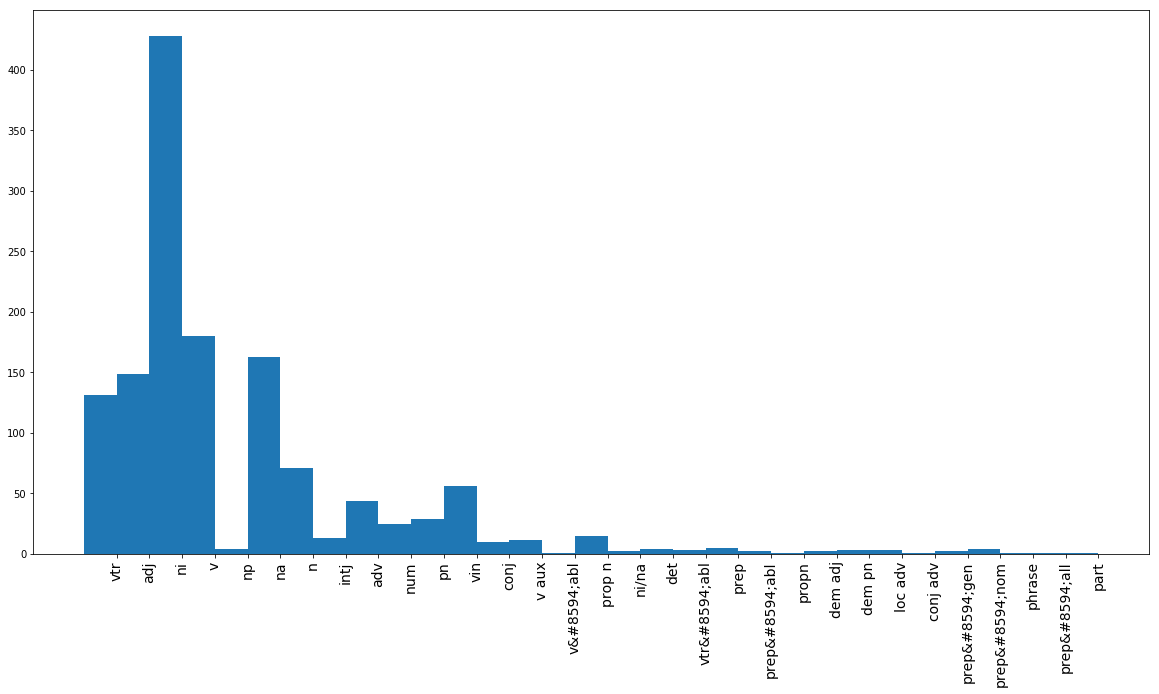

In [126]:
labels, values = zip(*Counter(data.values()).items())

label_size = 14
plt.rcParams['xtick.labelsize'] = label_size 
indexes = np.arange(len(labels))
width = 1
plt.figure(figsize=(20,10))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
plt.show()

In [133]:
first_letters = [word.decode("utf-8")[0].lower() for word in data.keys()]

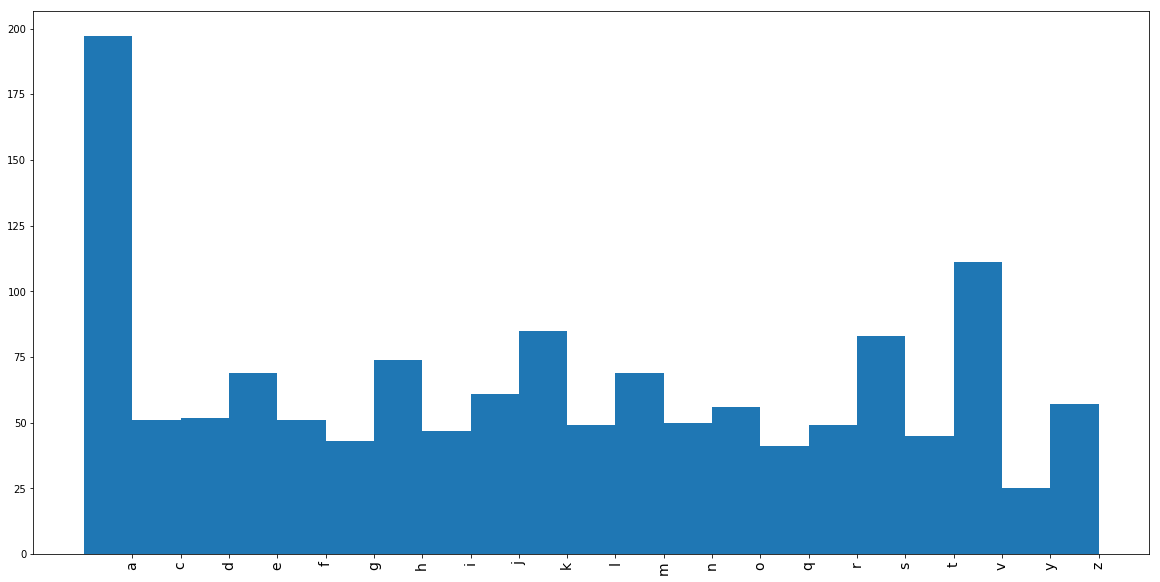

In [145]:
labels, values = zip(*sorted(Counter(first_letters).items(), key=operator.itemgetter(0)))
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size 
indexes = np.arange(len(labels))
width = 1
plt.figure(figsize=(20,10))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
plt.show()

# Транслитерация газеты

In [155]:
from alphabet_detector import AlphabetDetector
ad = AlphabetDetector()

In [146]:
req = urllib.request.Request('http://vpravda.ru/')
html = urllib.request.urlopen(req).read()
soup = BeautifulSoup(html, 'html.parser')

In [152]:
text = soup.text.split("\n")

In [153]:
text = [x for x in text if x != '']

In [173]:
regex_cyr_word = re.compile("[А-я]+(?:-[А-я]*)*")

In [174]:
def validate_word(word):
    if regex_cyr_word.match(word):
        if ad.is_cyrillic(word):
            return True
    return False

In [186]:
def preprocess_text(text):
    result = re.sub('([.,!?()»«])', r' \1 ', text)
    result = re.sub('\s{2,}', ' ', result)
    return result

In [176]:
def prerevolutionary_form(word):
    result = word + "ъ"
    return result

In [187]:
words = [word for line in text for word in preprocess_text(line).split() if validate_word(word)]
unique_words = set(words)

In [188]:
prerevolutionary_words = [prerevolutionary_form(word) for word in unique_words]

In [189]:
words_freq = Counter(words)

In [206]:
words_freq.most_common(10)

[('в', 112),
 ('на', 17),
 ('с', 15),
 ('и', 15),
 ('В', 12),
 ('Волгограде', 11),
 ('За', 10),
 ('из', 9),
 ('Волгоградской', 9),
 ('области', 9)]

In [207]:
for elem in words_freq.most_common(10):
    print(elem[0])

в
на
с
и
В
Волгограде
За
из
Волгоградской
области


# Дореволюционная орфография

In [29]:
try:
    from urllib.request import Request, urlopen  # Python 3
except:
    from urllib2 import Request, urlopen  # Python 2
import gzip
    
headers = {'Accept-Encoding':
'gzip, deflate', 'accept': '*/*','User-agent' : 'Mozilla/5.0 (Windows; U; Windows NT 5.1; de; rv:1.9.1.5) Gecko/20091102 Firefox/3.5.5'}
url = 'http://www.dorev.ru/ru-faq-yatroots.html'
req = Request(url, headers=headers)
with urllib.request.urlopen(req) as response:
    html = response.read()
    if(response.headers['content-encoding'] == 'gzip'):
        html = gzip.decompress(html)

In [35]:
html.decode("windows-1251")

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n<html>\n<!--\n#######################################################################################\n##   cms4site(TM) SITE CONSTRUCTION AND CONTENT MANAGEMENT SYSTEM 3.6.2\n##   (C)2001-2017 cms4site group ALL RIGHTS RESERVED. 22.12.2017 12:53:10 MSK\n##   127.0.0.2 [www.dorev.ru] 77.21.251.195 [U1: ip4d15fbc3.dynamic.kabel-deutschland.de]\n##   Apache/1.3.42 (Unix) PHP/5.2.17\n##   Mozilla/5.0 (Windows; U; Windows NT 5.1; de; rv:1.9.1.5) Gecko/20091102 Firefox/3.5.5 [gzip,deflate]\n##   399E6B54F955AB0A:380(795334)0.0042 \n#######################################################################################\n-->\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=windows-1251">\n<meta name="Content-Language" content="ru">\n<meta name="description" content="Употребление буквы ять - FAQ/Статьи - ДОРЕВОЛЮЦИОННАЯ ОРФОГРАФИЯ - Дореволюционный (дореформенный, царский, старый) орфографический словарь - cms